In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize

try:
    nltk.data.find('tokenizers/punkt.zip')
    nltk.data.find('tokenizers/punkt_tab.zip')
    nltk.data.find('corpora/stopwords.zip')
except LookupError:
    nltk.download('punkt')
    nltk.download('punkt_tab')
    nltk.download('stopwords')
    nltk.download('wordnet')

beauty_df = pd.read_csv('processed_beauty_data.csv')

In [2]:
from keras.models import load_model

# Load the saved model
model1 = load_model('beauty_review_model.h5')
model2 = load_model('fashion_review_model.h5')

In [3]:
beauty_df = pd.read_csv('processed_beauty_data.csv')
fashion_df  = pd.read_csv('fashion_reviews.csv')

fashion_df.head(10)

,rating,text,parent_asin
0,5.0,exactly wanted beautiful go many thing got gif...,B01IDS5X8E
1,2.0,inside cheaply made liked size wrestler like p...,B07F8V5DD6
2,2.0,incorrect sizing big pkg said way big previous...,B07FNGDK3Q
3,2.0,witty witty hoop way smaller anticipated think...,B0108I12M8
4,5.0,great stuff product great truly 5 star item pa...,B015J0H2EW
5,1.0,broke easy 2nd one bought son got feb 22nd got...,B0912M77HQ
6,4.0,four star nice white start rub awhile,B00WD5DRHS
7,4.0,stretch adorable son material really stretch e...,B07FK3GL7C
8,1.0,great idea poor quality like fit cut meant som...,B08419W69J
9,1.0,waste time money cheap even return inexpensive...,B07GGQ132Z


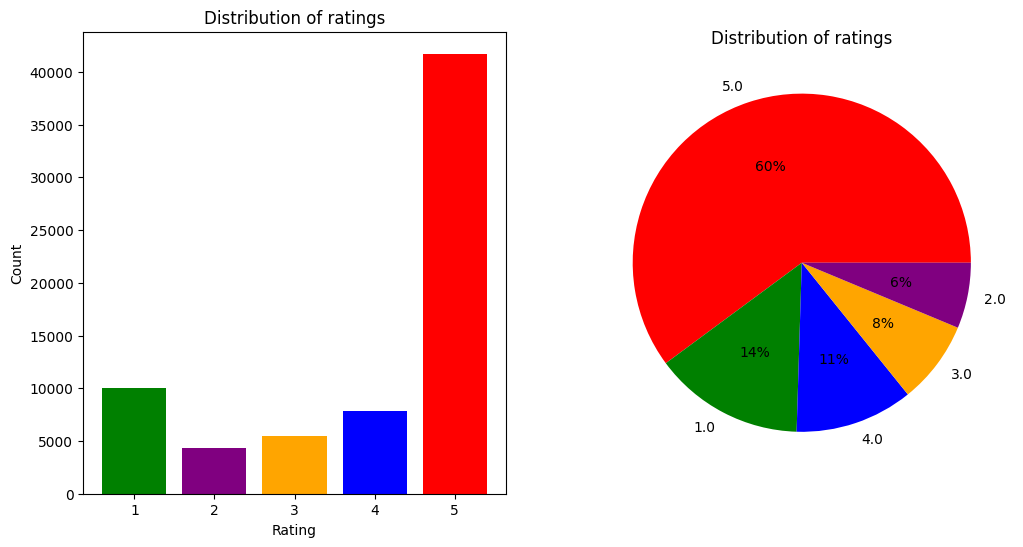

In [4]:
import matplotlib.pyplot as plt

distribution = beauty_df.value_counts('rating')
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.bar(distribution.index, distribution.values,color = colors)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of ratings')
plt.subplot(1,2,2)
plt.pie(distribution.values,labels=distribution.index, colors= colors, autopct='%.0f%%')
plt.title('Distribution of ratings')
plt.show()

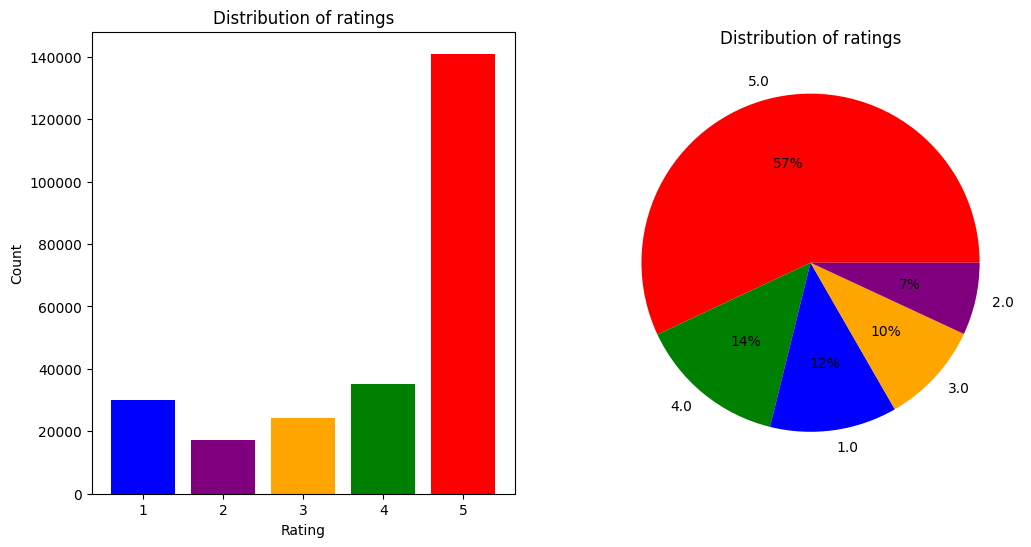

In [5]:
import matplotlib.pyplot as plt

distribution = fashion_df.value_counts('rating')
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.bar(distribution.index, distribution.values,color = colors)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of ratings')
plt.subplot(1,2,2)
plt.pie(distribution.values,labels=distribution.index, colors= colors, autopct='%.0f%%')
plt.title('Distribution of ratings')
plt.show()

# Embedding Beauty

In [6]:
# First of all apply and Train Word2Vec model to the dataset
import gensim

# Ensure all values in 'text' column are strings
beauty_df['text'] = beauty_df['text'].astype(str)

# Prepare the corpus for Word2Vec model
corpus = [word_tokenize(review) for review in beauty_df['text'].tolist()]

# Train the Word2Vec model
word2vec_model = gensim.models.Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the average embedding of a review
def get_embedding(text):
    tokens = word_tokenize(text)
    embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

beauty_df['embedding'] = beauty_df['text'].apply(get_embedding)

In [7]:
# First of all apply and Train Word2Vec model to the dataset
import gensim

# Ensure all values in 'text' column are strings
fashion_df['text'] = fashion_df['text'].astype(str)

# Prepare the corpus for Word2Vec model
corpus = [word_tokenize(review) for review in fashion_df['text'].tolist()]

# Train the Word2Vec model
word2vec_model = gensim.models.Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

fashion_df['embedding'] = fashion_df['text'].apply(get_embedding)

In [8]:
X = np.array(beauty_df['embedding'].tolist())
y = np.array(beauty_df['rating'].tolist())

# Reshape X to be 3D [samples, timesteps, features] if necessary
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluation

434/434 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - loss: 1.0661 - mean_absolute_error: 0.6238
Test Loss: 1.045886754989624
Test MAE: 0.6191437840461731
434/434 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


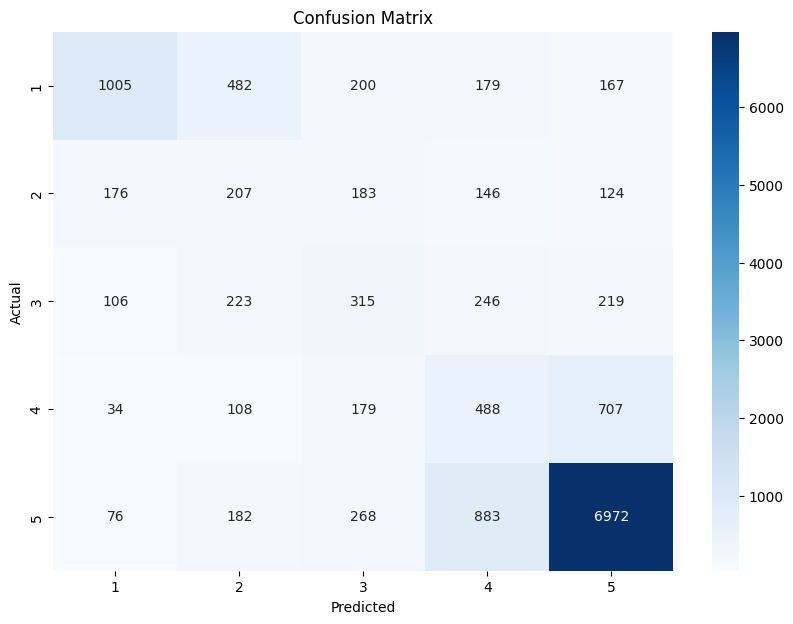

Precision: 0.6794970385359647
Accuracy: 0.6477117117117117
Recall: 0.6477117117117117
F1 Score: 0.6595900633357865


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
import seaborn as sns

# Evaluate the model
loss, mae = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test MAE: {mae}')

# Make predictions on the test set
y_pred = model1.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred.round())

# Calculate precision, accuracy, recall, and F1 score
precision = precision_score(y_test, y_pred.round(), average='weighted')
accuracy = accuracy_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round(), average='weighted')
f1 = f1_score(y_test, y_pred.round(), average='weighted')

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix,xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Precision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

# Test Section

In [15]:
from nltk.tokenize import word_tokenize

# Test 1: Evaluate the model on a subset of the fashion dataset
# Assuming 'fashion_df' has a 'text' and 'rating' column
beauty_df['text'] = beauty_df['text'].astype(str)
beauty_subset = beauty_df.sample(n=100, random_state=42) # Take a subset for faster testing
print(beauty_subset.iloc[0]['text'])


beauty_subset['embedding'] = beauty_subset['text'].apply(get_embedding)
X_beauty = np.array(beauty_subset['embedding'].tolist())
y_beauty = np.array(beauty_subset['rating'].tolist())

# Reshape for the model
X_beauty = X_beauty.reshape((X_beauty.shape[0], 1, X_beauty.shape[1]))
# Evaluate the model on the subset of the fashion dataset
loss_beauty, mae_beauty = model1.evaluate(X_beauty, y_beauty)
print(f'beauty Subset Test Loss: {loss_beauty}')
print(f'beauty Subset Test MAE: {mae_beauty}')


# Test 2: Predict ratings for new reviews in the beauty dataset and analyze the results
#new_reviews = [
#    "ok meh nothing special price disappointed br already gone back vanicream br fr age 41 sensitive congestion prone skin",  # 3 star and predicts 2
#    "good value described compact storage make transport easy organized",  # 4 stars
#    "highly recommended item good quality product",  # 5 stars
#    "nosepiece job nosepiece install easily enough adhesive hold long back drawing board",  # 2 sta
#]

new_reviews = [
    "try used yes carrot past good product thanks much",  # 5 star
    "good getting ready day ok bed hair brush good getting ready day made fine hair lose volume pep similar hair static without shock",  # 3 stars
    "ca use used couple different eyelash shampoo one burn eye even completely closed little bit might get hurt bad",  # 1 stars
    "really look pictured overly really look pictured overly thick root end shorter much much shown color shown basically white base purple tint white strand mixed made color really pop",  # 2 star
    "lasted couple month worked fine couple month shaved started screening loudly turned turn back would work normally second defending noise seems like one blade may gotten bent misplaced somehow never issue used plenty electric share" # 1 star
    ]

new_embeddings = [get_embedding(review) for review in new_reviews]

# Reshape the embeddings
X_new = np.array(new_embeddings).reshape(len(new_reviews), 1, 100)

predicted_ratings = model1.predict(X_new)
print("Predicted Ratings for New Reviews:")
for i, rating in enumerate(predicted_ratings):
  print(f"Review {i+1}: {round(rating[0])}") # Assuming a single rating output

great love thought discontinued happy see amazon
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.3307 - mean_absolute_error: 1.8263
beauty Subset Test Loss: 5.198142051696777
beauty Subset Test MAE: 1.8083374500274658
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Ratings for New Reviews:
Review 1: 4
Review 2: 4
Review 3: 4
Review 4: 1
Review 5: 1


# Fashion Section

# Embedding

In [11]:
# First of all apply and Train Word2Vec model to the dataset
import gensim

# Ensure all values in 'text' column are strings
fashion_df['text'] = fashion_df['text'].astype(str)

# Prepare the corpus for Word2Vec model
corpus = [word_tokenize(review) for review in fashion_df['text'].tolist()]

# Train the Word2Vec model
word2vec_model = gensim.models.Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

# Function to get the average embedding of a review
def get_embedding(text):
    tokens = word_tokenize(text)
    embeddings = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(word2vec_model.vector_size)

fashion_df['embedding'] = fashion_df['text'].apply(get_embedding)

In [12]:
X = np.array(fashion_df['embedding'].tolist())
y = np.array(fashion_df['rating'].tolist())

# Reshape X to be 3D [samples, timesteps, features] if necessary
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluation

1547/1547 ━━━━━━━━━━━━━━━━━━━━ 1s 511us/step - loss: 0.8891 - mean_absolute_error: 0.6042
Test Loss: 0.881446123123169
Test MAE: 0.5995841026306152
1547/1547 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step


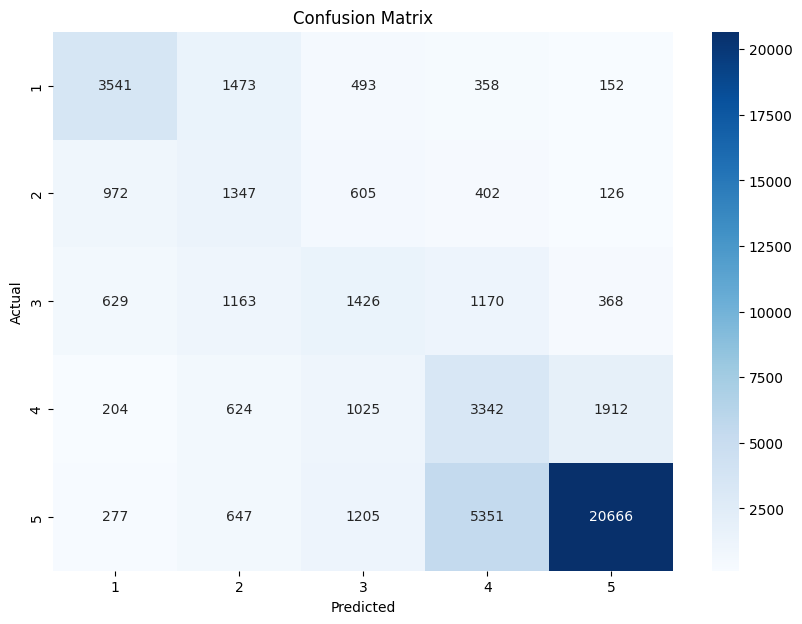

Precision: 0.6746929685024737
Accuracy: 0.6128380290230001
Recall: 0.6128380290230001
F1 Score: 0.6362567688790323


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
import seaborn as sns

# Evaluate the model
loss, mae = model2.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test MAE: {mae}')

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred.round())

# Calculate precision, accuracy, recall, and F1 score
precision = precision_score(y_test, y_pred.round(), average='weighted')
accuracy = accuracy_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round(), average='weighted')
f1 = f1_score(y_test, y_pred.round(), average='weighted')

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix,xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5], annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Precision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

# Test Section

In [14]:
from nltk.tokenize import word_tokenize

# Test 1: Evaluate the model on a subset of the fashion dataset
# Assuming 'fashion_df' has a 'text' and 'rating' column
fashion_df['text'] = fashion_df['text'].astype(str)
fashion_subset = fashion_df.sample(n=100, random_state=42) # Take a subset for faster testing
print(fashion_subset.iloc[0]['text'])


fashion_subset['embedding'] = fashion_subset['text'].apply(get_embedding)
X_fashion = np.array(fashion_subset['embedding'].tolist())
y_fashion = np.array(fashion_subset['rating'].tolist())

# Reshape for the model
X_fashion = X_fashion.reshape((X_fashion.shape[0], 1, X_fashion.shape[1]))
# Evaluate the model on the subset of the fashion dataset
loss_fashion, mae_fashion = model2.evaluate(X_fashion, y_fashion)
print(f'fashion Subset Test Loss: {loss_fashion}')
print(f'fashion Subset Test MAE: {mae_fashion}')


# Test 2: Predict ratings for new reviews in the fashion dataset and analyze the results
new_reviews = [
    "love jacket may compliment jacket work nurse important jacket cute also look professional structure jacket ordered coworkers well order definitely tight",  # 5 star
    "run small run small great jacket",  # 4 star
    "plastic cheap ugly oh know 34 pu leather 34 meant plastic feel foolish",  # 1 star
    "great little bag okay first let say great little bag carry lot item however clashing mechanism close bag stay closed regardless much item stay snapped shut walking pocketbook wide open without even realizing throughout day bad thing little purse great little purse",  # 3 stars
]

new_embeddings = [get_embedding(review) for review in new_reviews]

# Reshape the embeddings
X_new = np.array(new_embeddings).reshape(len(new_reviews), 1, 100)

predicted_ratings = model2.predict(X_new)
print("Predicted Ratings for New Reviews:")
for i, rating in enumerate(predicted_ratings):
  print(f"Review {i+1}: {round(rating[0])}") # Assuming a single rating output

husband love legendary product husband love legendary product pleasant surprised cap match shirt also legendary
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1444 - mean_absolute_error: 0.6771
fashion Subset Test Loss: 1.1292463541030884
fashion Subset Test MAE: 0.6838659644126892
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted Ratings for New Reviews:
Review 1: 5
Review 2: 4
Review 3: 1
Review 4: 3
